In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

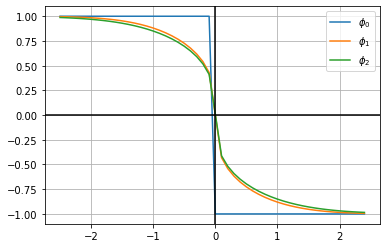

In [3]:
M_s = 1
p = 3

def phi0(T):
    return -np.sign(T)

def integrand(T,t):
    kernel = lambda T,t: np.exp(((-(M_s)**2)*(t-T)**2)/2)
    return (kernel(T,t)*phi(T))/pow((2*np.pi),1/2)



xlimit = 10
stepsize = 0.1
trange = np.arange(-xlimit,xlimit,stepsize)

xnew = np.arange(-xlimit/4,xlimit/4,stepsize)

phi = phi0
plt.plot(xnew,phi0(xnew),label=r'$\phi$'+'$_{niterations}$'.format(niterations=0))

for niterations in range(2):
    convolution = []
    for t in trange:
        convolution.append(integrate.quad(integrand, -xlimit, xlimit, args=(t,),limit=100))
    convolution = [x[0] for x in convolution]
    phi = [np.sign(v)*pow(abs(v),1/p) for v in convolution]
    #conv = tuple(convolution)
    phi = tuple(phi)
    phi = interpolate.interp1d(trange,phi,fill_value="extrapolate")

    ynew = phi(xnew)

    plt.plot(xnew,ynew,label=r'$\phi$'+'$_{niterations}$'.format(niterations=niterations+1))

plt.legend()
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()